# Machine Learning Development Project: Submission 1
## Mental Health Insights: Vulnerable Cancer Patients
- Nama: Nabila Jauza Firjatullah
- Email: nabila060695@gmail.com
- Id Dicoding: billa_firza

### Mount to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Read File

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/IDCamp2023/Pengembangan ML/Mental Health Dataset.csv')

In [ ]:
df.head()

,posts,predicted,intensity
0,I know as parent of child with down syndrome t...,negative,-1
1,but in my heart I know this is the future prom...,neutral,0
2,I have mylefibrosis which turn to leukemia the...,negative,-1
3,from one of my health group subject wayne dyer...,neutral,0
4,gmos now link to leukemia http nsnbc I 2013 07...,neutral,0


In [ ]:
print("==" * 20)
print(" " * 9, "Dataset Information")
print("==" * 20)
df.info()

          Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10392 entries, 0 to 10391
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   posts      10391 non-null  object
 1   predicted  10392 non-null  object
 2   intensity  10392 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 243.7+ KB


### EDA

- Duplicated Data

In [ ]:
print(f"{df.duplicated().sum()}")

0


- Missing Value

In [ ]:
df.isnull().sum()

posts        1
predicted    0
intensity    0
dtype: int64

In [ ]:
# Remove missing values adn reset index

df = df.dropna().reset_index(drop=True)

df.isnull().sum()

posts        0
predicted    0
intensity    0
dtype: int64

- Check Max Sequence

In [ ]:
seq_len = [None] * len(df)

for i,post in enumerate(df['posts']):

    seq_len[i] = len(post.split())

print("==" * 7)
print(f'Max seq: {max(seq_len)}')
print("==" * 7)

Max seq: 5413


### Preprocessing

In [ ]:
df = df.drop(columns=['intensity'])
df

,posts,predicted
0,I know as parent of child with down syndrome t...,negative
1,but in my heart I know this is the future prom...,neutral
2,I have mylefibrosis which turn to leukemia the...,negative
3,from one of my health group subject wayne dyer...,neutral
4,gmos now link to leukemia http nsnbc I 2013 07...,neutral
...,...,...
10386,hey everyone I am a 25 year old male I work ou...,negative
10387,have surgery for stage 1 colon cancer 1 year a...,very negative
10388,the doctor advise we he could not remove the a...,neutral
10389,my 66 year old father have been through so muc...,neutral


In [ ]:
def predicted_categories(category):
  if category == 'very negative' or category == 'negative':
    return 'negative'
  elif category == 'neutral':
    return 'neutral'
  else:
    return 'positive'

In [ ]:
df['predicted']=df['predicted'].apply(predicted_categories)
df

,posts,predicted
0,I know as parent of child with down syndrome t...,negative
1,but in my heart I know this is the future prom...,neutral
2,I have mylefibrosis which turn to leukemia the...,negative
3,from one of my health group subject wayne dyer...,neutral
4,gmos now link to leukemia http nsnbc I 2013 07...,neutral
...,...,...
10386,hey everyone I am a 25 year old male I work ou...,negative
10387,have surgery for stage 1 colon cancer 1 year a...,negative
10388,the doctor advise we he could not remove the a...,neutral
10389,my 66 year old father have been through so muc...,neutral


In [ ]:
predicted = pd.get_dummies(df.predicted)
df_baru = pd.concat([df, predicted], axis=1)
df_baru = df_baru.drop(columns='predicted')
df_baru

,posts,negative,neutral,positive
0,I know as parent of child with down syndrome t...,1,0,0
1,but in my heart I know this is the future prom...,0,1,0
2,I have mylefibrosis which turn to leukemia the...,1,0,0
3,from one of my health group subject wayne dyer...,0,1,0
4,gmos now link to leukemia http nsnbc I 2013 07...,0,1,0
...,...,...,...,...
10386,hey everyone I am a 25 year old male I work ou...,1,0,0
10387,have surgery for stage 1 colon cancer 1 year a...,1,0,0
10388,the doctor advise we he could not remove the a...,0,1,0
10389,my 66 year old father have been through so muc...,0,1,0


In [ ]:
post = df_baru['posts'].values
label = df_baru[['negative', 'neutral', 'positive']].values

In [ ]:
from sklearn.model_selection import train_test_split
post_latih, post_test, label_latih, label_test = train_test_split(post, label, test_size=0.2)

In [ ]:
len(df_baru['posts'])

10391

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10391, oov_token='x')
tokenizer.fit_on_texts(post_latih)
tokenizer.fit_on_texts(post_test)

sekuens_latih = tokenizer.texts_to_sequences(post_latih)
sekuens_test = tokenizer.texts_to_sequences(post_test)

padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.90 and logs.get('val_accuracy') > 0.75 ):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
num_epochs = 20

history = model.fit(padded_latih, label_latih, epochs=num_epochs,
                    validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])


Epoch 1/20
260/260 - 66s - loss: 0.7842 - accuracy: 0.6297 - val_loss: 0.6086 - val_accuracy: 0.7561 - 66s/epoch - 253ms/step
Epoch 2/20
260/260 - 53s - loss: 0.5207 - accuracy: 0.7960 - val_loss: 0.6583 - val_accuracy: 0.7787 - 53s/epoch - 205ms/step
Epoch 3/20
260/260 - 49s - loss: 0.4105 - accuracy: 0.8410 - val_loss: 0.5697 - val_accuracy: 0.7917 - 49s/epoch - 189ms/step
Epoch 4/20
260/260 - 47s - loss: 0.3287 - accuracy: 0.8829 - val_loss: 0.6310 - val_accuracy: 0.7869 - 47s/epoch - 182ms/step
Epoch 5/20
260/260 - 47s - loss: 0.2628 - accuracy: 0.9057 - val_loss: 0.6718 - val_accuracy: 0.7499 - 47s/epoch - 180ms/step
Epoch 6/20

Akurasi telah mencapai >90%!
260/260 - 42s - loss: 0.2145 - accuracy: 0.9250 - val_loss: 0.7824 - val_accuracy: 0.7662 - 42s/epoch - 162ms/step


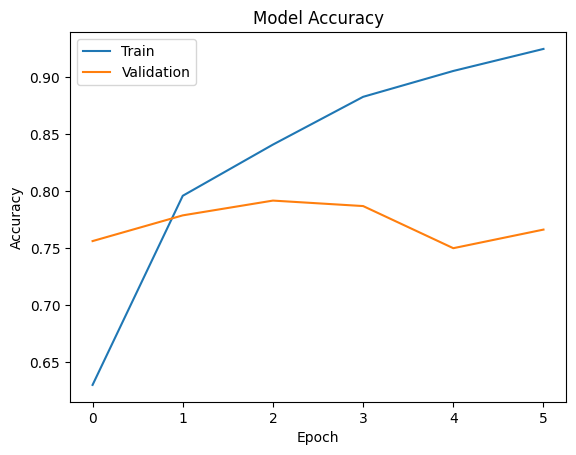

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
